# 4 IBC Alkalinity release movie

In [26]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
from ocean_c_lab_tools import *
from celluloid import Camera 
import PyCO2SYS as csys
import seawater as sw

In [27]:
grid=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland4_grd.nc')
grid_pr=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland3_grd.nc')
h=grid['h'].values
mask_rho=grid['mask_rho'].values
pm=grid['pm'].values
pn=grid['pn'].values

In [28]:
x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_BGC_alk/Iceland4_BGC_alk_rnd.2012062[2-3]150000.nc', combine='nested', concat_dim=["time"])
alk=x['Alk'].isel(s_rho=99).isel(time=slice(0,24)).load()
dic=x['DIC'].isel(s_rho=99).isel(time=slice(0,24)).load()

x_control=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_BGC_copy/Iceland4_BGC_rnd.20120622150000_OLD.nc', combine='nested', concat_dim=["time"])
alk_control=x_control['Alk'].isel(s_rho=99).isel(time=slice(0,24)).load()
dic_control=x_control['DIC'].isel(time=slice(0,24)).isel(s_rho=99).load()


x1=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_BGC_alk/Iceland4_BGC_alk_bgc_dia_avg.2012062[2-3]143000.nc', combine='nested', concat_dim=["time"])
pco2=x1['PCO2OC'].isel(time=slice(0,48)).load()
pH=x1['PH'].isel(time=slice(0,48)).load()
FCO2=x1['FG_CO2'].isel(time=slice(0,48)).load()

x1_control=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_BGC_copy/Iceland4_BGC_bgc_dia_avg.20120622143000_OLD.nc', combine='nested', concat_dim=["time"])
pco2_control=x1_control['PCO2OC'].isel(time=slice(0,48)).load()
pH_control=x1_control['PH'].isel(time=slice(0,48)).load()
FCO2_control=x1_control['FG_CO2'].isel(time=slice(0,48)).load()

FCO2_anom=FCO2-FCO2_control
pco2_anom=pco2-pco2_control
pH_anom=pH-pH_control
alk_anom=alk-alk_control
dic_anom=dic-dic_control

from roms_regrid import *

In [29]:
#FCO2_anom=roms_regrid(grid,FCO2_anom)
#alk=roms_regrid(grid,alk)

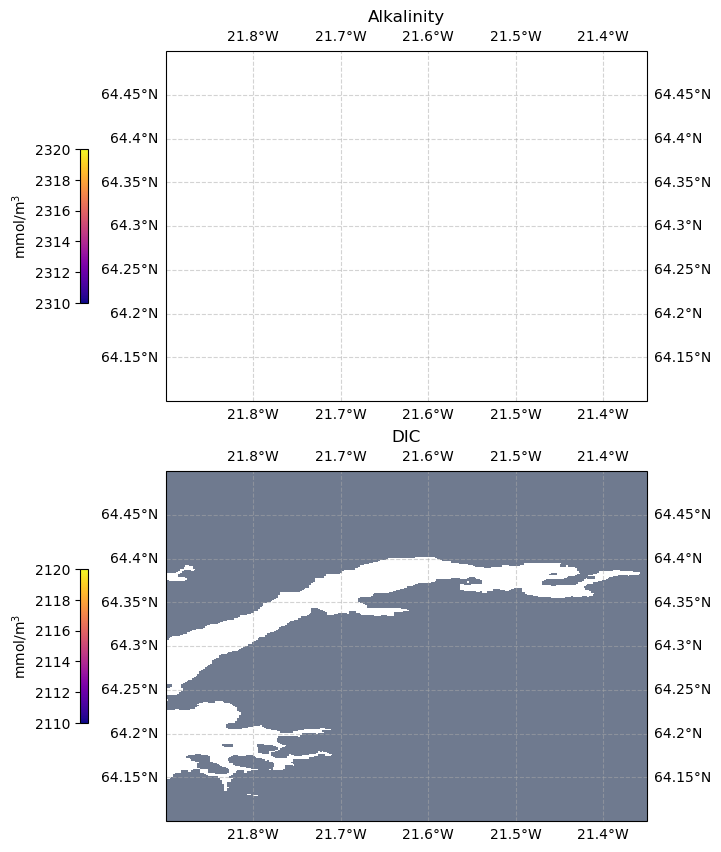

In [30]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(10, 10),subplot_kw={'projection': ccrs.PlateCarree()})
ax = axarr.flatten()
camera = Camera(fig)

k1=2300
k2=2350
k3=1
levels=np.arange(k1, k2, k3)
for i in range(24):
    
    ax[0].text(0.75, 0.9, 't='+str(i+1)+' hours', transform=ax[0].transAxes)
    sca = ax[0].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    alk.isel(time=i),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=2310, vmax=2320);

    ca1 = ax[0].pcolormesh(grid_pr.lon_rho,
                    grid_pr.lat_rho,
                    grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                    transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=-10, vmax=10);
    
    ax[1].text(0.77, 0.9, 't='+str(i+1)+' hours', transform=ax[1].transAxes)
    sca1 = ax[1].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    dic.isel(time=i),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=2110, vmax=2120);

    ca1 = ax[0].pcolormesh(grid_pr.lon_rho,
                    grid_pr.lat_rho,
                    grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                    transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=-10, vmax=10);
    camera.snap()


    
ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        color='darkgray', alpha=0.5, linestyle='--')
ax[0].set_extent([-21.9, -21.35, 64.1, 64.5], ccrs.PlateCarree())

ca2 = ax[1].pcolormesh(grid_pr.lon_rho,
                grid_pr.lat_rho,
                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                transform=ccrs.PlateCarree(),
            cmap='bone_r',vmin=-10, vmax=10);
ax[0].set_title('Alkalinity')
                       
ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    color='darkgray', alpha=0.5, linestyle='--')
ax[1].set_extent([-21.9, -21.35, 64.1, 64.5], ccrs.PlateCarree())
ax[1].set_title('DIC')

cb = fig.colorbar(sca, ax=ax[0], shrink=0.44,location='left')
cb.set_label('mmol/m$^3$', fontsize=10)
cb = fig.colorbar(sca1, ax=ax[1], shrink=0.44,location='left')

cb.set_label('mmol/m$^3$', fontsize=10)
animation = camera.animate()
HTML(animation.to_html5_video())
#ax[0].add_feature(cfeature.COASTLINE, facecolor='white')

#ax[0].add_feature(NaturalEarthFeature("physical", "land", "10m"))


In [31]:
animation.save('alk_DIC_anom.mp4')

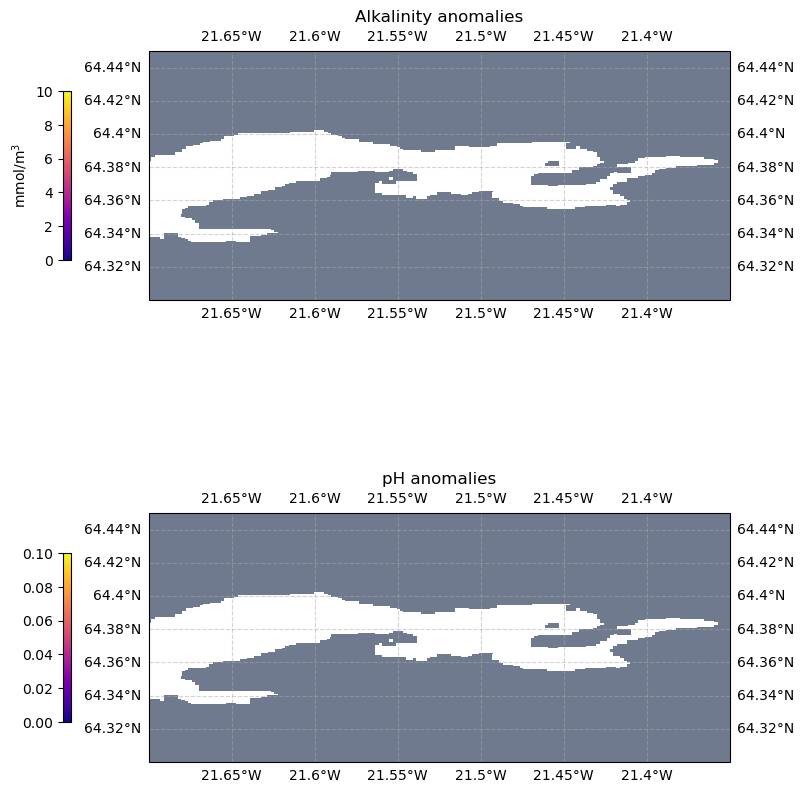

In [32]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(10, 11),subplot_kw={'projection': ccrs.PlateCarree()})
ax = axarr.flatten()
camera = Camera(fig)

k1=2300
k2=2350
k3=1
levels=np.arange(k1, k2, k3)
for i in range(24):
    
    ax[0].text(0.75, 0.9, 't='+str(i+1)+' hours', transform=ax[0].transAxes)
    sca = ax[0].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    alk_anom.isel(time=i),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=0, vmax=10);

    ax[1].text(0.77, 0.9, 't='+str(i+1)+' hours', transform=ax[1].transAxes)
    sca1 = ax[1].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    pH_anom.isel(time=i*2),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=0, vmax=0.1);

 #   ax[2].text(0.77, 0.9, 't='+str(i+1)+' hours', transform=ax[2].transAxes)
   
  #  sca2 = ax[2].pcolormesh(grid.lon_rho,
  #                  grid.lat_rho,
  #                  pH_anom.isel(time=i*2),
  #                  transform=ccrs.PlateCarree(),
  #                  cmap='seismic',vmin=-0.1, vmax=0.1);


    camera.snap()

ca1 = ax[0].pcolormesh(grid_pr.lon_rho,
                grid_pr.lat_rho,
                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                transform=ccrs.PlateCarree(),
            cmap='bone_r',vmin=-10, vmax=10);
    
ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        color='darkgray', alpha=0.5, linestyle='--')
ax[0].set_extent([-21.7, -21.35, 64.3, 64.45], ccrs.PlateCarree())

ca2 = ax[1].pcolormesh(grid_pr.lon_rho,
                grid_pr.lat_rho,
                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                transform=ccrs.PlateCarree(),
            cmap='bone_r',vmin=-10, vmax=10);

#ca2 = ax[2].pcolormesh(grid_pr.lon_rho,
#                grid_pr.lat_rho,
#                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
#                transform=ccrs.PlateCarree(),
#            cmap='bone_r',vmin=-10, vmax=10);


ax[0].set_title('Alkalinity anomalies')
                       
ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    color='darkgray', alpha=0.5, linestyle='--')
ax[1].set_extent([-21.7, -21.35, 64.3, 64.45], ccrs.PlateCarree())
ax[1].set_title('pH anomalies')

#ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                    color='gray', alpha=0.5, linestyle='--')
#ax[2].set_extent([-21.9, -21.35, 64.1, 64.5], ccrs.PlateCarree())
#ax[2].set_title('DIC')

cb = fig.colorbar(sca, ax=ax[0], shrink=0.44,location='left')
cb.set_label('mmol/m$^3$', fontsize=10)
cb = fig.colorbar(sca1, ax=ax[1], shrink=0.44,location='left')
#cb.set_label('mmol/m$^3$', fontsize=10)
#cb = fig.colorbar(sca2, ax=ax[2], shrink=0.44)
animation = camera.animate()
HTML(animation.to_html5_video())
#ax[0].add_feature(cfeature.COASTLINE, facecolor='white')

#ax[0].add_feature(NaturalEarthFeature("physical", "land", "10m"))

In [33]:
animation.save('alk_DIC.mp4')

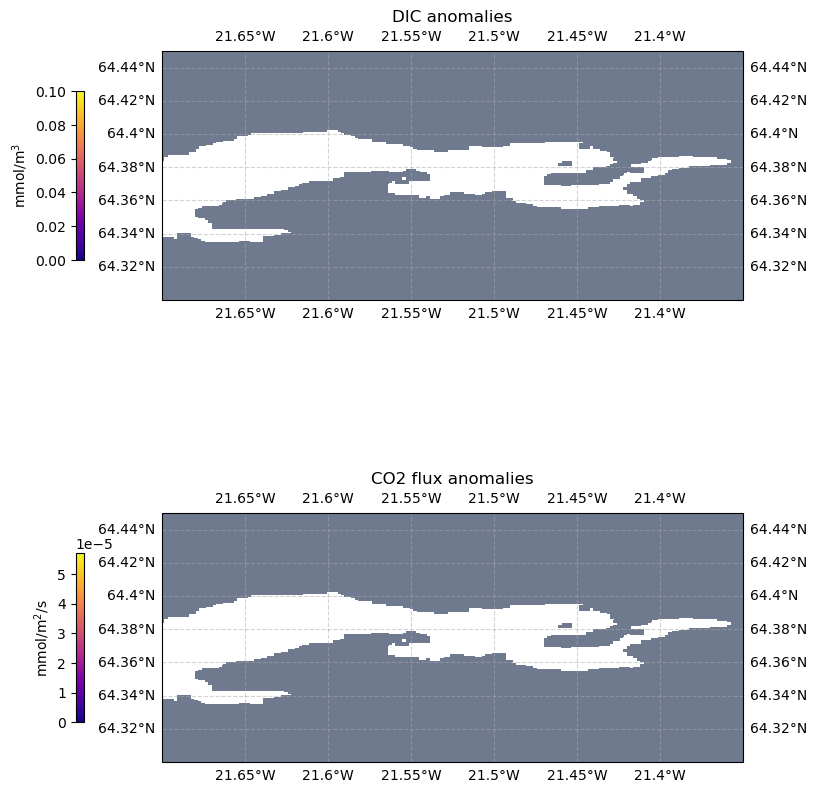

In [34]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(10, 11),subplot_kw={'projection': ccrs.PlateCarree()})
ax = axarr.flatten()
camera = Camera(fig)

k1=2300
k2=2350
k3=1
levels=np.arange(k1, k2, k3)
for i in range(24):
    
    ax[0].text(0.75, 0.9, 't='+str(i+1)+' hours', transform=ax[0].transAxes)
    sca = ax[0].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    dic_anom.isel(time=i),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=0, vmax=0.1);

    ax[1].text(0.77, 0.9, 't='+str(i+1)+' hours', transform=ax[1].transAxes)
    sca1 = ax[1].pcolormesh(grid.lon_rho,
                    grid.lat_rho,
                    FCO2_anom.isel(time=i*2),
                    transform=ccrs.PlateCarree(),
                    cmap='plasma',vmin=0, vmax=5.712839e-05);

 #   ax[2].text(0.77, 0.9, 't='+str(i+1)+' hours', transform=ax[2].transAxes)
   
  #  sca2 = ax[2].pcolormesh(grid.lon_rho,
  #                  grid.lat_rho,
  #                  pH_anom.isel(time=i*2),
  #                  transform=ccrs.PlateCarree(),
  #                  cmap='seismic',vmin=-0.1, vmax=0.1);


    camera.snap()

ca1 = ax[0].pcolormesh(grid_pr.lon_rho,
                grid_pr.lat_rho,
                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                transform=ccrs.PlateCarree(),
            cmap='bone_r',vmin=-10, vmax=10);
    
ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        color='darkgray', alpha=0.5, linestyle='--')
ax[0].set_extent([-21.7, -21.35, 64.3, 64.45], ccrs.PlateCarree())

ca2 = ax[1].pcolormesh(grid_pr.lon_rho,
                grid_pr.lat_rho,
                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
                transform=ccrs.PlateCarree(),
            cmap='bone_r',vmin=-10, vmax=10);

#ca2 = ax[2].pcolormesh(grid_pr.lon_rho,
#                grid_pr.lat_rho,
#                grid_pr['mask_rho'].where(grid_pr['mask_rho']<1),
#                transform=ccrs.PlateCarree(),
#            cmap='bone_r',vmin=-10, vmax=10);


ax[0].set_title('DIC anomalies')
                       
ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    color='darkgray', alpha=0.5, linestyle='--')
ax[1].set_extent([-21.7, -21.35, 64.3, 64.45], ccrs.PlateCarree())
ax[1].set_title('CO2 flux anomalies')

#ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                    color='gray', alpha=0.5, linestyle='--')
#ax[2].set_extent([-21.9, -21.35, 64.1, 64.5], ccrs.PlateCarree())
#ax[2].set_title('DIC')

cb = fig.colorbar(sca, ax=ax[0], shrink=0.44,location='left')
cb.set_label('mmol/m$^3$', fontsize=10)
cb = fig.colorbar(sca1, ax=ax[1], shrink=0.44,location='left')
cb.set_label('mmol/m$^2$/s', fontsize=10)
#cb = fig.colorbar(sca2, ax=ax[2], shrink=0.44)
animation = camera.animate()
HTML(animation.to_html5_video())
#ax[0].add_feature(cfeature.COASTLINE, facecolor='white')

#ax[0].add_feature(NaturalEarthFeature("physical", "land", "10m"))

In [35]:
animation.save('DIC_pCO2_anom.mp4')